<a href="https://colab.research.google.com/github/GeoDrk/Prob.-Y-Estadistica/blob/main/Unidad%205/Proba_U5_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
autos2 = pd.read_csv("autos_corregidos.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


lm = LinearRegression()


# variables independientes o variables predictoras
x = autos2[["city-mpg"]]


# Variable dependiente o variable objetivo a predecir
y = autos2["price"]
x.head(10)

,city-mpg
0,21
1,21
2,19
3,24
4,18
5,19
6,19
7,19
8,17
9,23


In [6]:
lm.fit(x,y)

LinearRegression()

In [7]:
Ypredict = lm.predict(x)

In [8]:
lm.intercept_

np.float64(34595.600842778265)

In [9]:
lm.coef_

array([-849.45322454])

In [10]:
lm.score(x,y)

0.4713797473570377

In [11]:
Ypred = 34595.600 - 849.45 * 24

In [12]:
Ypred

14208.799999999996

In [13]:
consumos_de_3_vehiculos = [[24],[12],[8]]

In [14]:
lm.predict(consumos_de_3_vehiculos)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14208.72345381, 24402.16214829, 27799.97504646])

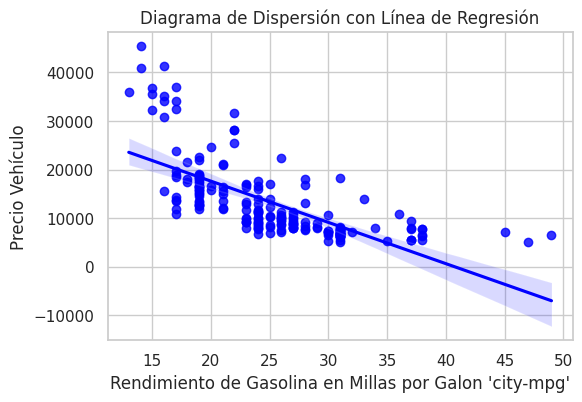

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir tamaño
plt.figure(figsize=(6, 4))

# Crear el diagrama de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.regplot(x='city-mpg', y='price', data=autos2, scatter=True, color='blue')
plt.title("Diagrama de Dispersión con Línea de Regresión")
plt.xlabel("Rendimiento de Gasolina en Millas por Galon 'city-mpg'")
plt.ylabel("Precio Vehículo")
plt.grid(True)
plt.show()

In [16]:
autos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [17]:
autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "curb-weight", "price"]].corr()

,horsepower,engine-size,city-mpg,wheel-base,curb-weight,price
horsepower,1.000000,0.822668,-0.822192,0.371178,0.757981,0.809607
engine-size,0.822668,1.000000,-0.650546,0.572027,0.849072,0.872335
city-mpg,-0.822192,-0.650546,1.000000,-0.470606,-0.749543,-0.686571
wheel-base,0.371178,0.572027,-0.470606,1.000000,0.782097,0.584642
curb-weight,0.757981,0.849072,-0.749543,0.782097,1.000000,0.834415
price,0.809607,0.872335,-0.686571,0.584642,0.834415,1.000000


In [18]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en 2 partes, una par entrenamiento de datos y otra para probar
autos2_train, autos2_test = train_test_split(autos2, random_state = 0)

In [19]:
# Variables predictoras para la fase de entrenamiento
x_autos2_train = autos2_train[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]

# Variable a predecir fase de entrenamiento
y_autos2_train = autos2_train[["price"]]

In [20]:
# Variables predictoras para la fase de prueba
x_autos2_test = autos2_test[["horsepower", "engine-size", "city-mpg", "wheel-base", "bore"]]

# Variable a predecir fase de prueba
y_autos2_test = autos2_test[["price"]]

In [21]:

# Fase del entrenamiento del modelo lineal lm METODO FIT
lm.fit(x_autos2_train, y_autos2_train)

LinearRegression()

In [22]:
lm.coef_

array([[   55.87951468,    87.75631659,   -71.38957243,   318.47013286,
        -2035.30729795]])

In [23]:
lm.intercept_

array([-26894.33570544])

In [24]:
lm.score(x_autos2_train, y_autos2_train)

0.7914372491008562

In [25]:
# Fase de prueba del modelo lineal lm usando el metodo PREDICT
yhat = lm.predict(x_autos2_test)

<ipython-input-26-bd5e2cdbaac7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_autos2_test["price"], hist=False, color="r")
<ipython-input-26-bd5e2cdbaac7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color="b", ax=ax1)


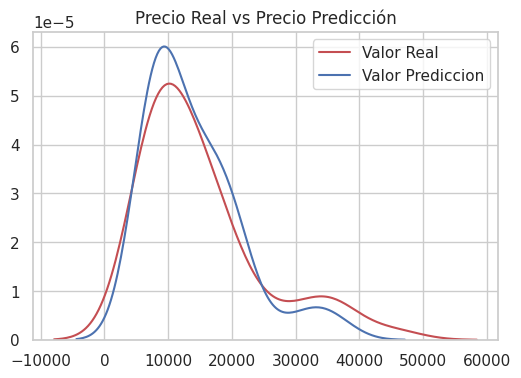

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

ax1 = sns.distplot(y_autos2_test["price"], hist=False, color="r")
sns.distplot(yhat, hist=False, color="b", ax=ax1)

plt.title('Precio Real vs Precio Predicción')
plt.xlabel('')
plt.ylabel('')
plt.legend(labels=['Valor Real','Valor Prediccion'])

plt.show()
plt.close()